<a href="https://colab.research.google.com/github/y471n/ml-notebooks/blob/main/dubai_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
CURRENT_DIR = '/content/drive/MyDrive/Colab Notebooks'
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# transactions-2025-03-30.csv is:
# From 01-01-2025 to 30-03-2025
# Transaction type: Sales
# Registration type: Ready
# Freehold: All
# Area: All
# Usage: Residential
# Property type: Unit
file_path = CURRENT_DIR + '/transactions-2025-03-30.csv'
df = pd.read_csv(file_path)

In [4]:
df.head(4)

,TRANSACTION_NUMBER,INSTANCE_DATE,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,AREA_EN,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,ACTUAL_AREA,ROOMS_EN,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN
0,11-10-2025,2025-01-02 08:47:58,Sales,Sale,Ready,Free Hold,Residential,DUBAI LAND RESIDENCE COMPLEX,Unit,Flat,...,86.16,2 B/R,B1-26,NaN,NaN,IMG World Adventures,1,1,NaN,THE V TOWER
1,11-1000-2025,2025-01-09 13:04:30,Sales,Sale,Ready,Free Hold,Residential,BURJ KHALIFA,Unit,Flat,...,148.64,2 B/R,B3-3260,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Burj Khalifa,1,1,NaN,THE ADDRESS DUBAI OPERA
2,11-10000-2025,2025-03-10 13:14:56,Sales,Sale,Ready,Free Hold,Residential,DUBAI LAND RESIDENCE COMPLEX,Unit,Flat,...,136.04,2 B/R,B3-26,NaN,NaN,IMG World Adventures,1,3,NaN,NaN
3,11-10001-2025,2025-03-10 13:20:40,Sales,Sale,Ready,Free Hold,Residential,LIWAN,Unit,Flat,...,58.38,1 B/R,G-30,NaN,NaN,IMG World Adventures,1,1,NaN,QPOINT LIWAN-PLOT R069


In [ ]:
# @title Cleanup columns

# Transaction number: ID
# INSTANCE_DATE: Date, Replace with YEAR, MONTH
df['YEAR'] = pd.DatetimeIndex(df['INSTANCE_DATE']).year
df['MONTH'] = pd.DatetimeIndex(df['INSTANCE_DATE']).month
# GROUP_EN = Sales always, not needed
# IS_OFFPLAN_EN = Ready in this data; not needed.
# USAGE_EN = Residential in this data; not needed
# PROP_TYPE_EN = Unit always; not needed
# PROP_SB_TYPE_EN = Flat this data; not needed
# ACTUAL_AREA = PROCEDURE_AREA; Remove PROCEDURE_AREA; keep ACTUAL_AREA
df.drop(columns=['GROUP_EN', 'IS_OFFPLAN_EN', 'USAGE_EN',
                 'PROP_TYPE_EN', 'PROP_SB_TYPE_EN', 'PROCEDURE_AREA', 'PARKING'],
        inplace=True)
# TRANS_VALUE = Amount; NEEDED

# There are only 2 values "Free Hold" and "Non Free Hold"
# We do label encoding for this
df['is_free_hold'] = (df['IS_FREE_HOLD_EN'] == 'Free Hold').astype(int)
# And drop the IS_FREE_HOLD_EN column
df.drop(columns=['IS_FREE_HOLD_EN'], inplace=True)

In [ ]:
le = LabelEncoder()
# df['MALL_CODE'] = le.fit_transform(df['NEAREST_MALL_EN'])
# df['LANDMARK_CODE'] = le.fit_transform(df['NEAREST_LANDMARK_EN'])
# df['METRO_CODE'] = le.fit_transform(df['NEAREST_METRO_EN'])
# df['AREA_CODE'] = le.fit_transform(df['AREA_EN'])
# df['PROJECT_CODE'] = le.fit_transform(df['MASTER_PROJECT_EN'])
mean_price_for_mall = df.groupby('NEAREST_MALL_EN')['TRANS_VALUE'].mean()
overall_mean_price = df['TRANS_VALUE'].mean()
df['mall_encoded'] = df['NEAREST_MALL_EN'].map(mean_price_for_mall)
df['mall_encoded'].fillna(overall_mean_price)


mean_price_for_landmark = df.groupby('NEAREST_LANDMARK_EN')['TRANS_VALUE'].mean()
df['landmark_encoded'] = df['NEAREST_LANDMARK_EN'].map(mean_price_for_landmark)
df['landmark_encoded'].fillna(overall_mean_price)

mean_price_for_metro = df.groupby('NEAREST_METRO_EN')['TRANS_VALUE'].mean()
df['metro_encoded'] = df['NEAREST_METRO_EN'].map(mean_price_for_metro)
df['metro_encoded'].fillna(overall_mean_price)

mean_price_for_area = df.groupby('AREA_EN')['TRANS_VALUE'].mean()
df['area_encoded'] = df['AREA_EN'].map(mean_price_for_area)
df['area_encoded'].fillna(overall_mean_price)

mean_price_for_project = df.groupby('MASTER_PROJECT_EN')['TRANS_VALUE'].mean()
df['project_encoded'] = df['MASTER_PROJECT_EN'].map(mean_price_for_project)
df['project_encoded'].fillna(overall_mean_price)

df = pd.get_dummies(columns=['ROOMS_EN'], data=df, dtype=float, drop_first=True)

,project_encoded
0,1.845581e+06
1,1.845581e+06
2,1.845581e+06
3,1.845581e+06
4,1.845581e+06
...,...
11984,1.845581e+06
11985,1.845581e+06
11986,1.845581e+06
11987,1.845581e+06


In [ ]:
df.head()

,TRANSACTION_NUMBER,INSTANCE_DATE,PROCEDURE_EN,AREA_EN,TRANS_VALUE,ACTUAL_AREA,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,...,ROOMS_EN_2 B/R,ROOMS_EN_3 B/R,ROOMS_EN_4 B/R,ROOMS_EN_5 B/R,ROOMS_EN_6 B/R,ROOMS_EN_GYM,ROOMS_EN_Office,ROOMS_EN_PENTHOUSE,ROOMS_EN_Shop,ROOMS_EN_Studio
0,11-10-2025,2025-01-02 08:47:58,Sale,DUBAI LAND RESIDENCE COMPLEX,900000.0,86.16,B1-26,NaN,NaN,IMG World Adventures,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11-1000-2025,2025-01-09 13:04:30,Sale,BURJ KHALIFA,7150000.0,148.64,B3-3260,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Burj Khalifa,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11-10000-2025,2025-03-10 13:14:56,Sale,DUBAI LAND RESIDENCE COMPLEX,1203000.0,136.04,B3-26,NaN,NaN,IMG World Adventures,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11-10001-2025,2025-03-10 13:20:40,Sale,LIWAN,480000.0,58.38,G-30,NaN,NaN,IMG World Adventures,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11-10002-2025,2025-03-10 13:34:49,Sale,JUMEIRAH LAKES TOWERS,2156900.0,91.08,DMCC-2308,Jumeirah Lakes Towers,Marina Mall,Sports City Swimming Academy,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


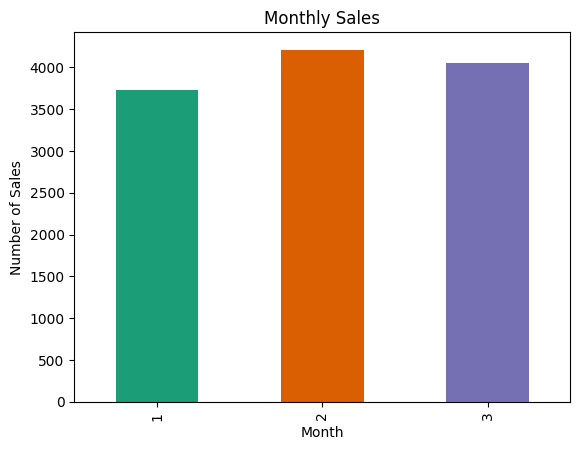

In [ ]:
sales_grouped_by_month = df.groupby('MONTH').size()
sales_grouped_by_month.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales')
plt.show()

,TRANSACTION_NUMBER,INSTANCE_DATE,PROCEDURE_EN,AREA_EN,TRANS_VALUE,ACTUAL_AREA,ROOMS_EN,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,...,MASTER_PROJECT_EN,PROJECT_EN,YEAR,MONTH,is_free_hold,mall_encoded,landmark_encoded,metro_encoded,area_encoded,project_encoded
0,11-10-2025,2025-01-02 08:47:58,Sale,DUBAI LAND RESIDENCE COMPLEX,900000.0,86.16,2 B/R,B1-26,NaN,NaN,...,NaN,THE V TOWER,2025,1,1,NaN,8.455523e+05,NaN,6.965633e+05,NaN
1,11-1000-2025,2025-01-09 13:04:30,Sale,BURJ KHALIFA,7150000.0,148.64,2 B/R,B3-3260,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,...,NaN,THE ADDRESS DUBAI OPERA,2025,1,1,2.667657e+06,4.899737e+06,2.810339e+06,4.399338e+06,NaN
2,11-10000-2025,2025-03-10 13:14:56,Sale,DUBAI LAND RESIDENCE COMPLEX,1203000.0,136.04,2 B/R,B3-26,NaN,NaN,...,NaN,NaN,2025,3,1,NaN,8.455523e+05,NaN,6.965633e+05,NaN
3,11-10001-2025,2025-03-10 13:20:40,Sale,LIWAN,480000.0,58.38,1 B/R,G-30,NaN,NaN,...,NaN,QPOINT LIWAN-PLOT R069,2025,3,1,NaN,8.455523e+05,NaN,7.936904e+05,NaN
4,11-10002-2025,2025-03-10 13:34:49,Sale,JUMEIRAH LAKES TOWERS,2156900.0,91.08,Office,DMCC-2308,Jumeirah Lakes Towers,Marina Mall,...,NaN,PLATINUM TOWER,2025,3,1,2.132684e+06,1.079861e+06,1.881628e+06,2.057127e+06,NaN


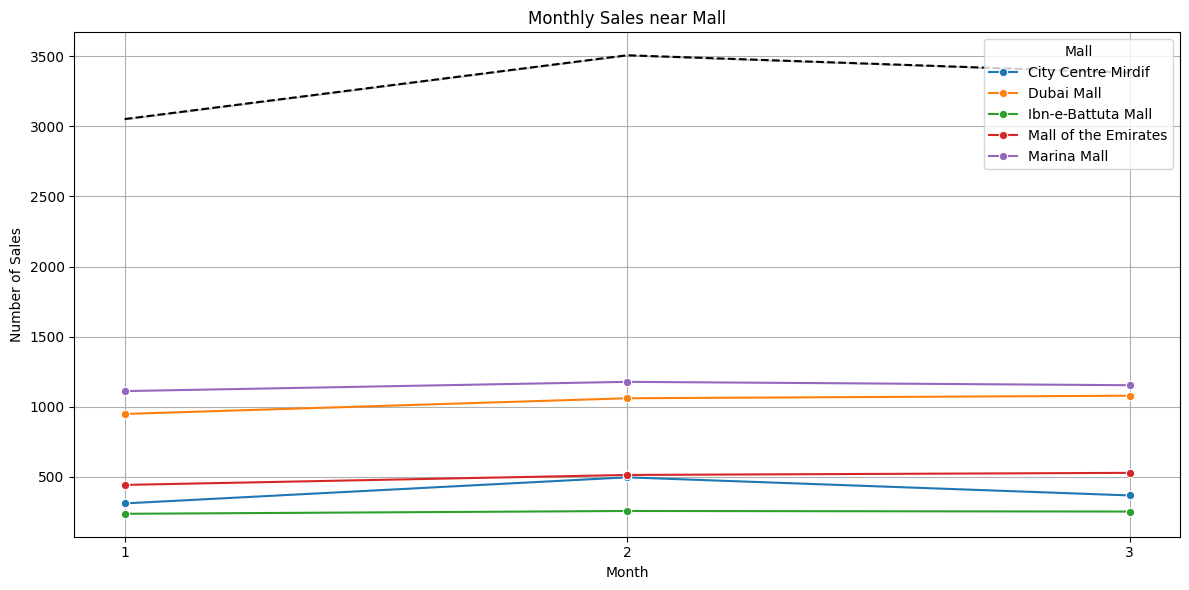

In [ ]:
# @title Monthly sales near malls
sales_grouped_by_mall = df.groupby(['MONTH', 'NEAREST_MALL_EN']).size().reset_index(name='sales')
sales_grouped_by_mall['total_sales_per_month'] = sales_grouped_by_mall.groupby('MONTH')['sales'].transform('sum')
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_grouped_by_mall, x='MONTH', y='sales', hue='NEAREST_MALL_EN', marker='o')
sns.lineplot(data=sales_grouped_by_mall, x='MONTH', y='total_sales_per_month', color='black', linestyle='--')
plt.title("Monthly Sales near Mall")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.legend(title="Mall", loc="upper right")
plt.xticks(range(1, 4))  # if all 12 months are present
plt.grid(True)
plt.tight_layout()
plt.show()


,0
MONTH,
1,3730
2,4209
3,4050


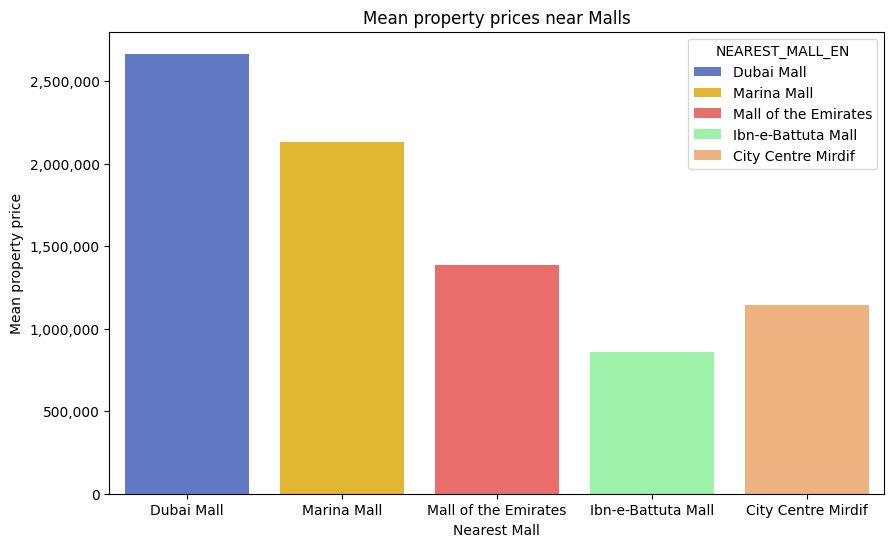

In [ ]:
# @title Mean property prices near Malls
plt.figure(figsize=(10, 6))
palette = sns.xkcd_palette([
    "cornflower blue",  # soft blue
    "sunflower",        # warm yellow
    "grapefruit",       # bright pink-red
    "mint green",       # fresh green
    "apricot",          # peachy orange
    # "lavender",         # light purple
    # "sky blue",         # gentle cyan
    # "salmon",           # pinkish-orange
    # "goldenrod",        # golden yellow
    # "medium grey",      # neutral
])

ax = sns.barplot(y='mall_encoded', x='NEAREST_MALL_EN', hue='NEAREST_MALL_EN',
                 data=df, palette=palette)
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.xlabel('Nearest Mall')
plt.ylabel('Mean property price')
plt.title('Mean property prices near Malls')
plt.show()

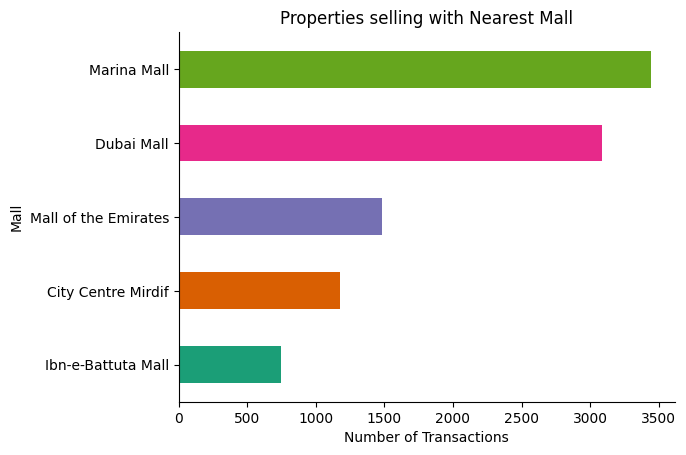

In [ ]:
# @title Properties selling near to Malls
df.groupby('NEAREST_MALL_EN').size().sort_values().plot(kind='barh',
                                                        color=sns.palettes.mpl_palette('Dark2'))
plt.title('Properties selling with Nearest Mall')
plt.xlabel('Number of Transactions')
plt.ylabel('Mall')
plt.gca().spines[['top', 'right',]].set_visible(False)

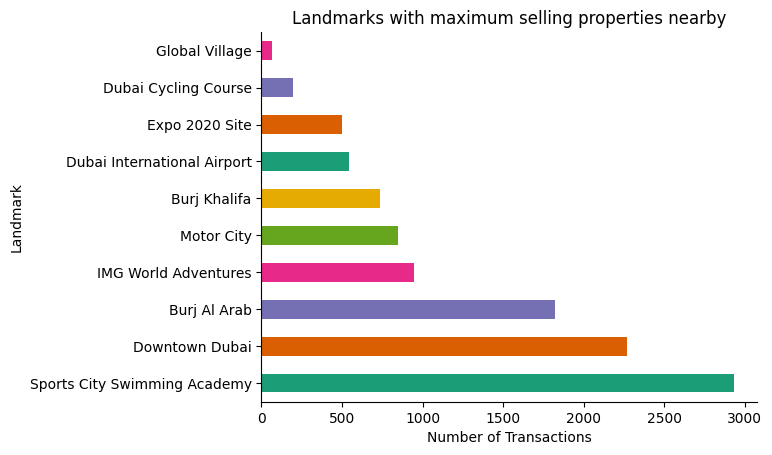

In [ ]:
# @title Landmarks with maximum selling properties nearby
df.groupby('NEAREST_LANDMARK_EN').size().sort_values(ascending=False)[:10].plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Number of Transactions')
plt.ylabel('Landmark')
plt.title('Landmarks with maximum selling properties nearby')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Top 10 Metro Stations with property selling')

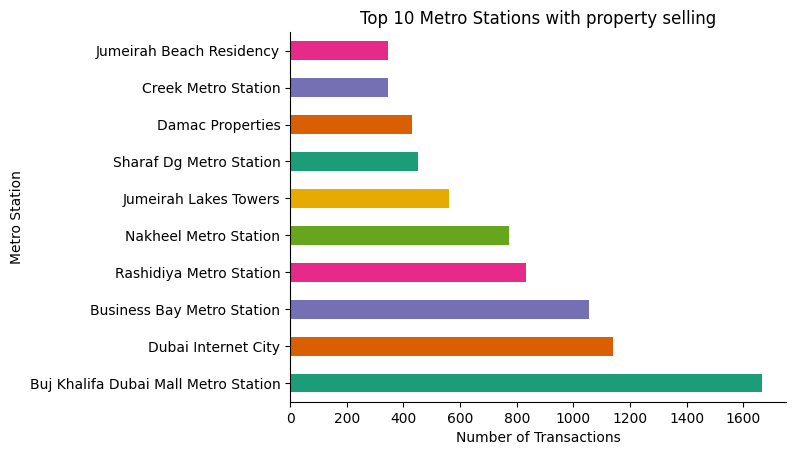

In [ ]:
# @title Top 10 Metro Stations with property selling
df.groupby('NEAREST_METRO_EN').size().sort_values(ascending=False)[:10].plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Number of Transactions')
plt.ylabel('Metro Station')
plt.title('Top 10 Metro Stations with property selling')

Text(0.5, 1.0, 'Top 10 Selling Dubai Areas')

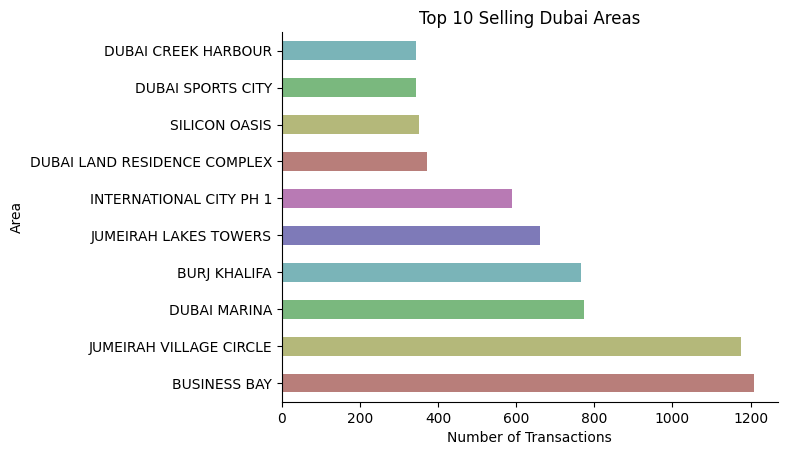

In [ ]:
# @title Top 10 Selling Dubai Areas
df.groupby('AREA_EN').size().sort_values(ascending=False)[:10].plot(kind='barh', color=sns.palettes.hls_palette(s=.3))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Number of Transactions')
plt.ylabel('Area')
plt.title('Top 10 Selling Dubai Areas')

In [ ]:
df['MASTER_PROJECT_EN'].value_counts()

,count
MASTER_PROJECT_EN,
Remraam - Al Ramth,8
Jebel Ali Village Townhouses- Phase 1,6


In [ ]:
df.head()

,TRANSACTION_NUMBER,INSTANCE_DATE,PROCEDURE_EN,AREA_EN,TRANS_VALUE,ACTUAL_AREA,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,...,ROOMS_EN_2 B/R,ROOMS_EN_3 B/R,ROOMS_EN_4 B/R,ROOMS_EN_5 B/R,ROOMS_EN_6 B/R,ROOMS_EN_GYM,ROOMS_EN_Office,ROOMS_EN_PENTHOUSE,ROOMS_EN_Shop,ROOMS_EN_Studio
0,11-10-2025,2025-01-02 08:47:58,Sale,DUBAI LAND RESIDENCE COMPLEX,900000.0,86.16,B1-26,NaN,NaN,IMG World Adventures,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11-1000-2025,2025-01-09 13:04:30,Sale,BURJ KHALIFA,7150000.0,148.64,B3-3260,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Burj Khalifa,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11-10000-2025,2025-03-10 13:14:56,Sale,DUBAI LAND RESIDENCE COMPLEX,1203000.0,136.04,B3-26,NaN,NaN,IMG World Adventures,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11-10001-2025,2025-03-10 13:20:40,Sale,LIWAN,480000.0,58.38,G-30,NaN,NaN,IMG World Adventures,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11-10002-2025,2025-03-10 13:34:49,Sale,JUMEIRAH LAKES TOWERS,2156900.0,91.08,DMCC-2308,Jumeirah Lakes Towers,Marina Mall,Sports City Swimming Academy,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.describe()

,TRANS_VALUE,ACTUAL_AREA,TOTAL_BUYER,TOTAL_SELLER,YEAR,MONTH,is_free_hold,mall_encoded,landmark_encoded,metro_encoded,...,ROOMS_EN_2 B/R,ROOMS_EN_3 B/R,ROOMS_EN_4 B/R,ROOMS_EN_5 B/R,ROOMS_EN_6 B/R,ROOMS_EN_GYM,ROOMS_EN_Office,ROOMS_EN_PENTHOUSE,ROOMS_EN_Shop,ROOMS_EN_Studio
count,1.198900e+04,11989.000000,11989.000000,11989.000000,11989.0,11989.000000,11989.000000,9.942000e+03,1.089900e+04,9.949000e+03,...,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000
mean,1.845581e+06,100.835612,1.139044,1.159396,2025.0,2.026691,0.960547,1.974815e+06,1.903667e+06,1.974257e+06,...,0.243890,0.078989,0.007757,0.001501,0.000167,0.000083,0.049128,0.001752,0.004588,0.220202
std,3.041744e+06,296.075251,0.431803,0.626838,0.0,0.805152,0.194678,6.200316e+05,1.139279e+06,1.101034e+06,...,0.429445,0.269733,0.087736,0.038720,0.012915,0.009133,0.216145,0.041817,0.067579,0.414400
min,3.427190e+03,8.140000,0.000000,0.000000,2025.0,1.000000,0.000000,8.607204e+05,8.164166e+05,4.933333e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000e+05,54.640000,1.000000,1.000000,2025.0,1.000000,1.000000,1.385344e+06,1.079861e+06,1.041881e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.110000e+06,79.260000,1.000000,1.000000,2025.0,2.000000,1.000000,2.132684e+06,1.221022e+06,1.881628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.040000e+06,119.970000,1.000000,1.000000,2025.0,3.000000,1.000000,2.667657e+06,2.285599e+06,2.810339e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.059510e+08,31186.320000,8.000000,17.000000,2025.0,3.000000,1.000000,2.667657e+06,4.899737e+06,1.009468e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['TRANS_VALUE']

,TRANS_VALUE
TRANS_VALUE,1.000000
ACTUAL_AREA,0.494693
TOTAL_BUYER,0.074651
TOTAL_SELLER,0.001241
YEAR,NaN
MONTH,0.000951
is_free_hold,0.070461
mall_encoded,0.193064
landmark_encoded,0.369684
metro_encoded,0.342950
